# Zonal tracers with some slow restoring

In [1]:
# load modules 

import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
import os 
from xgcm import Grid
from xarrayutils import aggregate
import copy
# Pseudo Inversion 
from scipy.linalg import pinv, eig

In [3]:
data_dir = '/swot/SUM05/dbalwada/channel_model_output/varying_res/05km/run_multi_tracer_restored/'

# brief comment on how often was the model data saved 
# the mode outputs fields every 5 days, averages are also
# calculated over 5 days (*this creates stupid amounts of 
# unnecessary data, and was definitely a terrible idea in hidsight).
# 

iters = range(10473120, 10473120+518400*4, 1440)
model_vars = ['uVeltave','vVeltave','wVeltave', 'Ttave', 'ETAtave']
ds_model = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/utils.py:423: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


In [3]:
data_dir = '/swot/SUM05/dbalwada/channel_model_output/varying_res/05km/run_multi_tracer_restored/'

# brief comment on how often was the model data saved 
# the mode outputs fields every 5 days, averages are also
# calculated over 5 days (*this creates stupid amounts of 
# unnecessary data, and was definitely a terrible idea in hidsight).
# 

iters = range(10473120, 10473120+518400*4, 1440)
model_vars = ['tracer1_diag', 'tracer2_diag', 'tracer3_diag']
ds_tracers = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/utils.py:423: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


In [12]:
ds_tracers

<xarray.Dataset>
Dimensions:   (XC: 400, XG: 400, YC: 400, YG: 400, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 55)
Coordinates:
  * XC        (XC) >f4 2500.0 7500.0 12500.0 ... 1987500.0 1992500.0 1997500.0
  * YC        (YC) >f4 2500.0 7500.0 12500.0 ... 1987500.0 1992500.0 1997500.0
  * XG        (XG) >f4 0.0 5000.0 10000.0 ... 1985000.0 1990000.0 1995000.0
  * YG        (YG) >f4 0.0 5000.0 10000.0 ... 1985000.0 1990000.0 1995000.0
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 ... -2624.5 -2727.5 -2830.5 -2933.5
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 ... -2779.0 -2882.0 -2985.0
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 ... -2779.0 -2882.0 -2985.0
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 ... -2573.0 -2676.0 -2779.0 -2882.0
    rA        (YC, XC) >f4 dask.array<shape=(400, 400), chunksize=(400, 400)>
    dxG       (YG, XC) >f4 dask.array<shape=(400, 400), chunksize=(400, 400)>
    dyG       (YC, XG) >f4 dask.array<shape=(400, 400), chunksize=(400, 400)>
    Depth     (YC, XC)

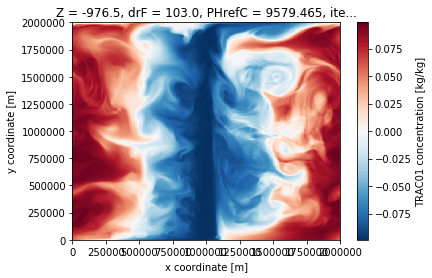

In [9]:
ds_tracers.TRAC01.isel(time=2).sel(Z=-1000, method='nearest').plot()

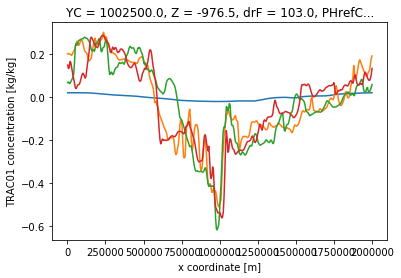

In [16]:
ds_tracers.TRAC01.isel(time=0).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC01.isel(time=20).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC01.isel(time=40).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC01.isel(time=-1).sel(YC=1000e3,Z=-1000, method='nearest').plot()

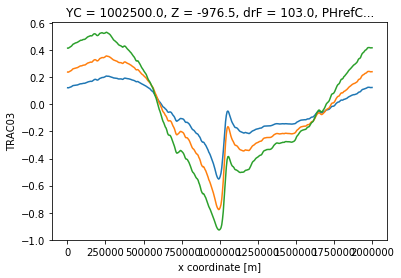

In [22]:
ds_tracers.TRAC01.isel(time=slice(20,55)).sel(YC=1000e3,Z=-1000, method='nearest').mean('time').plot()
ds_tracers.TRAC02.isel(time=slice(20,55)).sel(YC=1000e3,Z=-1000, method='nearest').mean('time').plot()
ds_tracers.TRAC03.isel(time=slice(20,55)).sel(YC=1000e3,Z=-1000, method='nearest').mean('time').plot()


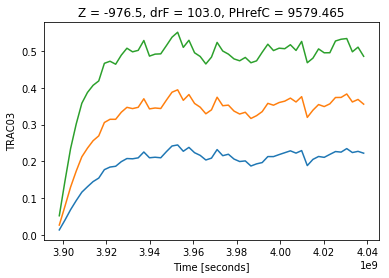

In [21]:
ds_tracers.TRAC01.sel(XC=slice(0,500e3), YC=slice(500e3, 1000e3)).sel(Z=-1000, method='nearest').mean(['XC','YC']).plot()
ds_tracers.TRAC02.sel(XC=slice(0,500e3), YC=slice(500e3, 1000e3)).sel(Z=-1000, method='nearest').mean(['XC','YC']).plot()
ds_tracers.TRAC03.sel(XC=slice(0,500e3), YC=slice(500e3, 1000e3)).sel(Z=-1000, method='nearest').mean(['XC','YC']).plot()

In [ ]:
ds_tracers.TRAC01.sel(XC=slice(0,500e3), YC=slice(500e3, 1000e3)).sel(Z=-1000, method='nearest').mean(['XC','YC']).plot()

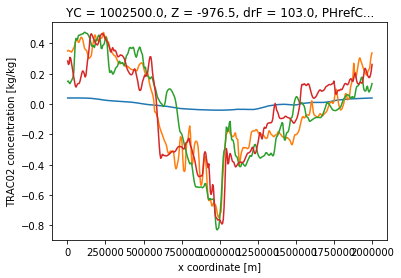

In [15]:
ds_tracers.TRAC02.isel(time=0).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC02.isel(time=20).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC02.isel(time=40).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC02.isel(time=-1).sel(YC=1000e3,Z=-1000, method='nearest').plot()

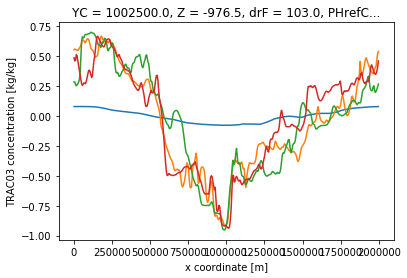

In [17]:
ds_tracers.TRAC03.isel(time=0).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC03.isel(time=20).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC03.isel(time=40).sel(YC=1000e3,Z=-1000, method='nearest').plot()
ds_tracers.TRAC03.isel(time=-1).sel(YC=1000e3,Z=-1000, method='nearest').plot()

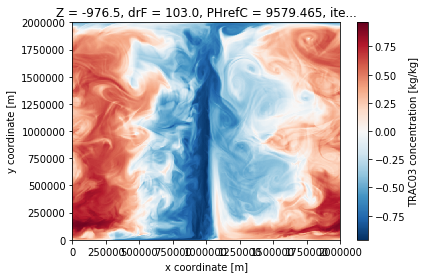

In [6]:
ds_tracers.TRAC03.isel(time=-1).sel(Z=-1000, method='nearest').plot()

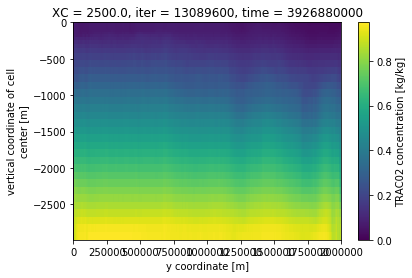

In [8]:
ds_tracers.TRAC02.isel(time=-1).sel(XC=0, method='nearest').plot()

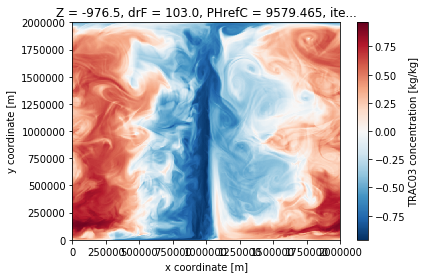

In [23]:
ds_tracers.TRAC03.isel(time=-1).sel(Z=-1000, method='nearest').plot()

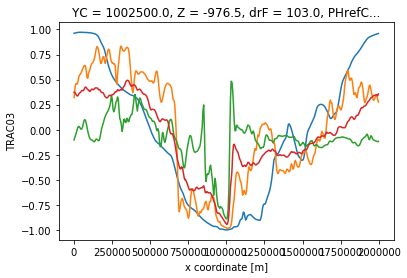

In [25]:
ds_tracers.TRAC03.isel(time=0).sel(YC=1000e3, Z=-1000, method='nearest').plot()
ds_tracers.TRAC03.isel(time=4).sel(YC=1000e3, Z=-1000, method='nearest').plot()
ds_tracers.TRAC03.isel(time=-1).sel(YC=1000e3, Z=-1000, method='nearest').plot()
ds_tracers.TRAC03.mean('time').sel(YC=1000e3, Z=-1000, method='nearest').plot()